Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Ridge and Lasso Regression: Problem solving

In this session, we'll use the `boston` dataset, which has been used to examine the relationship between clean air and house prices:


| Variable | Type | Description |
|:----|:-----|:----------|
|crim | Ratio | per capita crime rate by town | 
|zn | Ratio | proportion of residential land zoned for lots over 25,000 sq. ft. | 
|indus | Ratio | proportion of non-retain business acres per town | 
|chas | Nominal (binary) | Charles River dummy variable (=1 if tract bounds river, =0 otherwise) | 
|nox | Ratio | nitrogen oxides concentration (parts per 10 million) | 
|rm | Ratio | average number of rooms per dwelling | 
|age | Ratio | proportion of owner-occupied units built prior to 1940 | 
|dis | Ratio | weighted mean of distances to five Boston employment centers | 
|rad | Ordinal | index of accessibility to radial highways | 
|tax | Ratio | full-value property tax rate per \$10,000 | 
|ptratio | Ratio | pupil-teacher ratio by town | 
|lstat | Ratio | percent lower status of population (defined as non-high school graduate, manual labor) | 
|medv | Ratio | median value of owner-occupied homes in $1000s | 

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
</div>

As before, we'll try to predict `medv` using the rest of the variables.

**Because `medv` is a ratio variable, we will use linear regression not logistic regression.**

## Load data

Import `pandas` to load a dataframe.

In [3]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="importAs" id="/k@:}OLWtAh)hpx[.2^]" x="150" y="308"><field name="libraryName">pandas</field><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field></block></xml>

Load the dataframe.

In [7]:
dataframe = pd.read_csv('datasets/boston.csv')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="FJGldw(qFp?V=E]uaN)4" x="42" y="131"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="VALUE"><block type="varDoMethod" id="4s18v%0iqE%_l@{fLYCo"><mutation items="1"></mutation><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="O)3kf2`BSXix*SoL;|Iu"><field name="TEXT">datasets/boston.csv</field></block></value></block></value></block></xml>

## Explore data

Describe the data.

In [9]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod" id="-[lX-}4sT`|#7E(Sti)^" x="8" y="188"><mutation items="1"></mutation><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


-----------
**QUESTION:**

Do the min, mean, and max look reasonable to you, given what these variables mean (see the data description above)?

**ANSWER: (click here to edit)**

*Yes they all look reasonable.*

--------------------

Make a correlation heatmap.

First import `plotly.express`.

In [12]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="importAs" id="JKd}DIrGfV*IelKZ!4ls" x="129" y="219"><field name="libraryName">plotly.express</field><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field></block></xml>

And show the heatmap

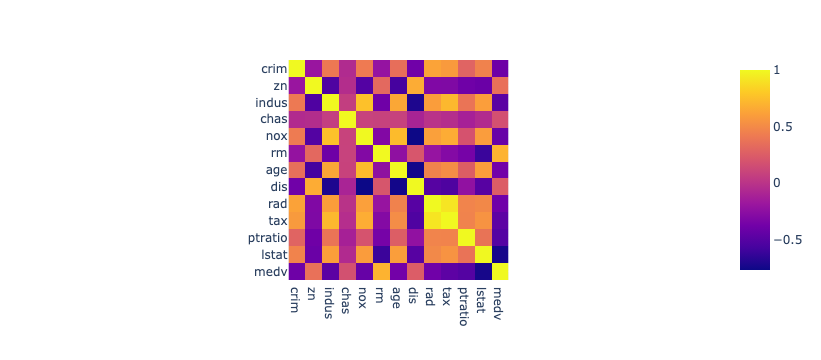

In [36]:
px.imshow(dataframe.corr(),x= (dataframe.columns),y= (dataframe.columns))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod" id="EF`/tTuKg}l7Oy[-o+}y" x="94" y="115"><mutation items="3"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">imshow</field><data>px:imshow</data><value name="ADD0"><block type="varDoMethod" id=":|2.GsRJx8:WR$YQy~$n"><mutation items="1"></mutation><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">corr</field><data>dataframe:corr</data></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id="QeHYh`JcbWkvjiAb#b2V"><field name="CODE">x=</field><value name="INPUT"><block type="varGetProperty" id="/vYQg`Cuz:h-XLHhddX8"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">columns</field><data>dataframe:columns</data></block></value></block></value><value name="ADD2"><block type="valueOutputCodeBlock" id="]2Q;Ba|DvC?in2IkRuh="><field name="CODE">y=</field><value name="INPUT"><block type="varGetProperty" id="CV|7}0kCeKP((+|7mf[("><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">columns</field><data>dataframe:columns</data></block></value></block></value></block></xml>

----------------------

**QUESTION:**

Do we have strong positive correlations, strong negative correlations, or both?

**ANSWER: (click here to edit)**

*Both. The yellow/orange are strong positive and the purple/indigo are strong negative.*

-----------------

**QUESTION:**

Given the nature of these variables, do these correlations surprise you? 

**ANSWER: (click here to edit)**

*No, we would expect many of these to be related by economic factors.*

-----------------

## Prepare train/test sets

Do the imports needed to split the dataframe into `X` and `Y`.

In [39]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable></variables><block type="importAs" id="sN1YO5FEzpHyxb31@j,Z" x="16" y="10"><field name="libraryName">sklearn.model_selection</field><field name="VAR" id="uASGz64Zb$AOvQyV4pRj">model_selection</field></block></xml>

Create `X` by dropping the response variable `medv` from the dataframe.

In [44]:
X = dataframe.drop(columns=['medv'])

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Eu6+HM0^Zfw6=$49Xgk7">X</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="variables_set" id="bzZTS1@$}n#~vk7l2~9!" x="0" y="0"><field name="VAR" id="Eu6+HM0^Zfw6=$49Xgk7">X</field><value name="VALUE"><block type="varDoMethod" id="W{$DG6fLq}9XMB;w~tpR"><mutation items="1"></mutation><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">drop</field><data>dataframe:drop</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="Zw9lXfSq)CoG;!c{$MJO"><field name="CODE">columns=['medv']</field></block></value></block></value></block><block type="variables_get" id="#q})(XOCzk$7)B7(`STB" x="38" y="93"><field name="VAR" id="Eu6+HM0^Zfw6=$49Xgk7">X</field></block></xml>

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


Create `Y` by pulling just `medv` from the dataframe.

In [46]:
Y = dataframe[['medv']]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="vEy06PN?Djk]8Ag?;UWi">Y</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="variables_set" id="mu*+:7,;wUl/G3WC?~[1" x="28" y="-272"><field name="VAR" id="vEy06PN?Djk]8Ag?;UWi">Y</field><value name="VALUE"><block type="indexer" id="3,DFaMh*a07B/[#{pcY#"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="INDEX"><block type="lists_create_with" id="7CG2MkS#du1xOH_Ca3ZR"><mutation items="1"></mutation><value name="ADD0"><block type="text" id=")5H0~!;RVY0z=POYKKEh"><field name="TEXT">medv</field></block></value></block></value></block></value></block></xml>

Now do the splits.

In [104]:
splits = model_selection.train_test_split(X,Y)

splits[2]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable><variable id="Eu6+HM0^Zfw6=$49Xgk7">X</variable><variable id="vEy06PN?Djk]8Ag?;UWi">Y</variable></variables><block type="variables_set" id="oTGRJ#{R!U^we@Bl@pkT" x="0" y="0"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field><value name="VALUE"><block type="varDoMethod" id="f?j@ker(a#hJv;Nh)IGX"><mutation items="2"></mutation><field name="VAR" id="uASGz64Zb$AOvQyV4pRj">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="ADD0"><block type="variables_get" id="lncPzF4Na!`TRYIq.|yR"><field name="VAR" id="Eu6+HM0^Zfw6=$49Xgk7">X</field></block></value><value name="ADD1"><block type="variables_get" id="EU[i(wKX[qHiv^%11`_G"><field name="VAR" id="vEy06PN?Djk]8Ag?;UWi">Y</field></block></value></block></value></block><block type="lists_getIndex" id="_`M[I3LFL~(:jdW~fD{j" x="71" y="190"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="u4+:nf~Bme0Z~-hn|LN@"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="p9Vbc_1?|I#(@nw.o1`?"><field name="NUM">3</field></block></value></block></xml>

,medv
275,32.0
401,7.2
282,46.0
132,23.0
316,17.8
...,...
406,11.9
368,50.0
307,28.2
478,14.6


## Model 1: Linear regression

Do the imports needed to build and evaluate a linear regression model that uses scaling.

In [106]:
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import numpy as np
import sklearn.preprocessing as pp
import sklearn.pipeline as pipe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="cGnMvhq5543q[r$:Og-x">linear_model</variable><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable></variables><block type="importAs" id="C,|uKYZ4CH*/,cD|4($8" x="135" y="303"><field name="libraryName">sklearn.linear_model</field><field name="VAR" id="cGnMvhq5543q[r$:Og-x">linear_model</field><next><block type="importAs" id="*G_SVgZ;}hIr,Hi1~$Z6"><field name="libraryName">sklearn.metrics</field><field name="VAR" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><next><block type="importAs" id="8;{*.D?hUhOnD8:R9Vfr"><field name="libraryName">numpy</field><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><next><block type="importAs" id="/YAkt4vqDQp/.5;pPcY."><field name="libraryName">sklearn.preprocessing</field><field name="VAR" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><next><block type="importAs" id="O15G]dI#1oM;`7^r@Pr,"><field name="libraryName">sklearn.pipeline</field><field name="VAR" id="=z9KfSBWpoDS,oj-?yx,">pipe</field></block></next></block></next></block></next></block></next></block></xml>

### Training

Make a pipeline to scale and train in one step.

**Hint: `with linear_model create LinearRegression using`**

In [114]:
std_clf = pipe.make_pipeline(pp.StandardScaler(),linear_model.LinearRegression())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`P)`+jl|;h{.[r}{78q6">std_clf</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable><variable id="cGnMvhq5543q[r$:Og-x">linear_model</variable></variables><block type="variables_set" id="}81D/tZY#o}$E:M}:u4x" x="0" y="0"><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><value name="VALUE"><block type="varDoMethod" id="(Noh/e~gvTM3-4|;g]s["><mutation items="2"></mutation><field name="VAR" id="=z9KfSBWpoDS,oj-?yx,">pipe</field><field name="MEMBER">make_pipeline</field><data>pipe:make_pipeline</data><value name="ADD0"><block type="varCreateObject" id="hQ{6{U-Q~6`#y;%KXZM:"><mutation items="1"></mutation><field name="VAR" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><field name="MEMBER">StandardScaler</field><data>pp:StandardScaler</data></block></value><value name="ADD1"><block type="varCreateObject" id="lbWMbNY~KDXUyi,nb`{B"><mutation items="1"></mutation><field name="VAR" id="cGnMvhq5543q[r$:Og-x">linear_model</field><field name="MEMBER">LinearRegression</field><data>linear_model:LinearRegression</data></block></value></block></value></block></xml>

Fit the pipeline.

In [122]:
std_clf.fit(splits[0],splits[2])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`P)`+jl|;h{.[r}{78q6">std_clf</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="Z)$q-zn.KTC{+^l-wH6u" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><field name="MEMBER">fit</field><data>std_clf:fit</data><value name="ADD0"><block type="lists_getIndex" id="S][E]W/X5AE~$S9x}0g`"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="kp_BHX(z|pv~-vp4_F5f"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="6!{`}[_5(E6-yxmuv+34"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="_`M[I3LFL~(:jdW~fD{j"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="u4+:nf~Bme0Z~-hn|LN@"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="p9Vbc_1?|I#(@nw.o1`?"><field name="NUM">3</field></block></value></block></value></block></xml>

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

### Evaluation

Get the $r^2$ on the test splits (see linear regression notebooks).

**Hint: `do score using a list containing Xtest and Ytest` (from splits)**

In [138]:
print('r2:' + str(std_clf.score(splits[0],splits[2])))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`P)`+jl|;h{.[r}{78q6">std_clf</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="text_print" id="6KCf/4(JectOv*aO[L6d" x="0" y="0"><value name="TEXT"><block type="text_join" id="|l|?2Yb#{m=ys_V^)+v-"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="8MdDU0D^rCAqKltb#kaY"><field name="TEXT">r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="p`ehX8lLN?zayQ1Ip=}V"><mutation items="2"></mutation><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><field name="MEMBER">score</field><data>std_clf:score</data><value name="ADD0"><block type="lists_getIndex" id="_`M[I3LFL~(:jdW~fD{j"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="u4+:nf~Bme0Z~-hn|LN@"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="p9Vbc_1?|I#(@nw.o1`?"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="E-Q~2D@spfC9*$vtn|e!"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="SDwa4Tp5TiV#zIailym?"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id=";NjDR,|B%tZu=VzeN$xo"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></xml>

r2:0.7168384307446847


------------------------
**QUESTION:**

Is this a good $r^2$?

**ANSWER: (click here to edit)**

*It's pretty good, especially since it is on test data.*

------------------------

Print the coefficients of the model

In [173]:
print(X.columns)

std_clf[1].coef_

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Eu6+HM0^Zfw6=$49Xgk7">X</variable></variables><block type="text_print" id="Xsa=JYNexON$?bJ=}(%K" x="192" y="244"><value name="TEXT"><block type="varGetProperty" id=":UK;M7wsp}KV3C[#=ufx"><field name="VAR" id="Eu6+HM0^Zfw6=$49Xgk7">X</field><field name="MEMBER">columns</field><data>X:columns</data></block></value></block><block type="dummyOutputCodeBlock" id="81bzjf9JuN^UcGh*yRV3" x="260" y="363"><field name="CODE">std_clf[1].coef_</field></block></xml>

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')


array([[-1.06659298,  1.21542212,  0.52094269,  0.63008325, -2.17962293,
         2.24609188,  0.14572611, -2.9203101 ,  2.27222575, -1.77266232,
        -1.94058999, -4.12976995]])

------------------------
**QUESTION:**

What are the two variables that most positively impact house price?
What are the two variables that most negatively impact house price?

**ANSWER: (click here to edit)**

*Positive: `rm` (rooms per dwelling) and `rad` (distance to highway)
Negative: `lstat` (lower status) and `nox` (air quality).*

------------------------

<!-- TODO: might be worth doing diagnostics for each model, though I'm concerned about how long that would take -->

## Model 2: Lasso regression (alpha=.25)

### Training

Make a pipeline to scale and train in one step.

**Hint: `with linear_model create Lasso using alpha=.25`**

**Alpha is different from C so bigger numbers mean bigger penalties.**

In [209]:
std_clf_lasso25 = pipe.make_pipeline(pp.StandardScaler(),linear_model.Lasso(alpha=0.25))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="3,Px5LeEX8#KHZdo}cMj">std_clf_lasso25</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable><variable id="cGnMvhq5543q[r$:Og-x">linear_model</variable></variables><block type="variables_set" id="}81D/tZY#o}$E:M}:u4x" x="0" y="0"><field name="VAR" id="3,Px5LeEX8#KHZdo}cMj">std_clf_lasso25</field><value name="VALUE"><block type="varDoMethod" id="(Noh/e~gvTM3-4|;g]s["><mutation items="2"></mutation><field name="VAR" id="=z9KfSBWpoDS,oj-?yx,">pipe</field><field name="MEMBER">make_pipeline</field><data>pipe:make_pipeline</data><value name="ADD0"><block type="varCreateObject" id="`$510:|737!p@eG{9`Fu"><mutation items="1"></mutation><field name="VAR" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><field name="MEMBER">StandardScaler</field><data>pp:StandardScaler</data></block></value><value name="ADD1"><block type="varCreateObject" id="(-WNg)B!xI}$)`XlQiN="><mutation items="1"></mutation><field name="VAR" id="cGnMvhq5543q[r$:Og-x">linear_model</field><field name="MEMBER">Lasso</field><data>linear_model:Lasso</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="i98h3Y~PZMpT9Sd3]1{6"><field name="CODE">alpha=0.25</field></block></value></block></value></block></value></block></xml>

Fit the pipeline.

In [220]:
std_clf_lasso25.fit(splits[0],splits[2])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="3,Px5LeEX8#KHZdo}cMj">std_clf_lasso25</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="Z)$q-zn.KTC{+^l-wH6u" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="3,Px5LeEX8#KHZdo}cMj">std_clf_lasso25</field><field name="MEMBER">fit</field><data>std_clf_lasso25:fit</data><value name="ADD0"><block type="lists_getIndex" id="{U8pmx?[?q~v;(@sKM2E"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id=",}BzFitzICv?x$qH%,*="><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="wbBRI,|*X`y%I=Z#:y_l"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="C}RS,D{/Oz,e1rjLI/e`"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id=",Cke{Iqb5LE[!=f+I$27"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="UWxK|j=!2~sJO;=P}m.M"><field name="NUM">3</field></block></value></block></value></block></xml>

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.25))])

### Evaluation

Get the $r^2$ on the test splits.

In [240]:
print('r2:' + str(std_clf_lasso25.score(splits[0],splits[2])))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="3,Px5LeEX8#KHZdo}cMj">std_clf_lasso25</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="text_print" id="6KCf/4(JectOv*aO[L6d" x="0" y="0"><value name="TEXT"><block type="text_join" id="|l|?2Yb#{m=ys_V^)+v-"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="8MdDU0D^rCAqKltb#kaY"><field name="TEXT">r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="Z)$q-zn.KTC{+^l-wH6u"><mutation items="2"></mutation><field name="VAR" id="3,Px5LeEX8#KHZdo}cMj">std_clf_lasso25</field><field name="MEMBER">score</field><data>std_clf_lasso25:score</data><value name="ADD0"><block type="lists_getIndex" id="{U8pmx?[?q~v;(@sKM2E"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id=",}BzFitzICv?x$qH%,*="><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="wbBRI,|*X`y%I=Z#:y_l"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="C}RS,D{/Oz,e1rjLI/e`"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id=",Cke{Iqb5LE[!=f+I$27"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="UWxK|j=!2~sJO;=P}m.M"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></xml>

r2:0.6941154595384736


------------------------
**QUESTION:**

How does this compare to the previous $r^2$? 
Should we be concerned?

**ANSWER: (click here to edit)**

*We lost 3-4% of the variance, but since we know our variables are highly correlated, we might be OK with that. We should look at the model to decide.*

------------------------

Print how many coefficients are not zero.

In [242]:
print('alpha=.25:' + str(np.sum((std_clf_lasso25[1].coef_ != 0))))


alpha=.25:8


Print the coefficients of the model

In [245]:
std_clf_lasso25[1].coef_

array([-0.3501803 ,  0.20936018, -0.        ,  0.56915501, -0.79391272,
        2.54417519, -0.        , -1.19389946,  0.        , -0.        ,
       -1.59254588, -4.0049763 ])

------------------------
**QUESTION:**

What are the two variables that most positively impact house price?
What are the two variables that most negatively impact house price?
How is this different from before?

**ANSWER: (click here to edit)**

*Positive: `rm` (rooms per dwelling) and `chas` (next to river)
Negative: `lstat` (lower status) and `ptratio` (teacher ratio).*
Both `rad` and `nox` changed. `rad` went to zero and `nox` went towards zero.

------------------------

## Model 3: Lasso regression (alpha=.75)

### Training

Make a pipeline to scale and train in one step, using alpha=.75.

In [272]:
std_clf_lasso75 = pipe.make_pipeline(pp.StandardScaler(),linear_model.Lasso(alpha=0.75))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="q1J}F(vBK]9@{^K9+Yni">std_clf_lasso75</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable><variable id="cGnMvhq5543q[r$:Og-x">linear_model</variable></variables><block type="variables_set" id="VJpFwulv)FMljfC)|7lk" x="13" y="109"><field name="VAR" id="q1J}F(vBK]9@{^K9+Yni">std_clf_lasso75</field><value name="VALUE"><block type="varDoMethod" id="6Xt`}lYXRY48L;ukKb7~"><mutation items="2"></mutation><field name="VAR" id="=z9KfSBWpoDS,oj-?yx,">pipe</field><field name="MEMBER">make_pipeline</field><data>pipe:make_pipeline</data><value name="ADD0"><block type="varCreateObject" id="`$510:|737!p@eG{9`Fu"><mutation items="1"></mutation><field name="VAR" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><field name="MEMBER">StandardScaler</field><data>pp:StandardScaler</data></block></value><value name="ADD1"><block type="varCreateObject" id="(-WNg)B!xI}$)`XlQiN="><mutation items="1"></mutation><field name="VAR" id="cGnMvhq5543q[r$:Og-x">linear_model</field><field name="MEMBER">Lasso</field><data>linear_model:Lasso</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="i98h3Y~PZMpT9Sd3]1{6"><field name="CODE">alpha=0.75</field></block></value></block></value></block></value></block></xml>

Fit the pipeline.

In [274]:
std_clf_lasso75.fit(splits[0],splits[2])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="q1J}F(vBK]9@{^K9+Yni">std_clf_lasso75</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="Z)$q-zn.KTC{+^l-wH6u" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="q1J}F(vBK]9@{^K9+Yni">std_clf_lasso75</field><field name="MEMBER">fit</field><data>std_clf_lasso75:fit</data><value name="ADD0"><block type="lists_getIndex" id="C%81BkB_^!xzcsCb+In4"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="k]Q-Ype=)$0%,%S{YTT4"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="8u)?vfC?toKu,q`$!TrV"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="/4e-mc^B%_O39f$*s~yT"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="uR]ii(RAnE/$rf~lfAeJ"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="O*BJ?T={N8u#LuQ-wSgZ"><field name="NUM">3</field></block></value></block></value></block></xml>

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.75))])

<!-- Now we can get predictions from the model for our test data: -->

<!-- predictions_lasso75 = std_clf_lasso75.predict(splits[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+c@nB4b@*dAXK60P0,vq">predictions_lasso75</variable><variable id="q1J}F(vBK]9@{^K9+Yni">std_clf_lasso75</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="variables_set" id="NHw$/HH988vNLbZgn)CM" x="88" y="212"><field name="VAR" id="+c@nB4b@*dAXK60P0,vq">predictions_lasso75</field><value name="VALUE"><block type="varDoMethod" id="N}3ds6:i%0MtTA:(2im4"><field name="VAR" id="q1J}F(vBK]9@{^K9+Yni">std_clf_lasso75</field><field name="MEMBER">predict</field><data>std_clf_lasso75:predict</data><value name="INPUT"><block type="lists_create_with" id="3Ru6U*^.a`oD7$bu/I%y"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="@lpyN+:CEcPQ#Q:Svm|9"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ng))4fZyb@U1|eswo1}:"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Lo)w=2LL|Tf-L/gkeTdT"><field name="NUM">2</field></block></value></block></value></block></value></block></value></block></xml> -->


### Evaluation

Get the $r^2$ on the test splits.

In [285]:
print('r2:' + str(std_clf_lasso75.score(splits[0],splits[2])))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="q1J}F(vBK]9@{^K9+Yni">std_clf_lasso75</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="text_print" id="6KCf/4(JectOv*aO[L6d" x="0" y="0"><value name="TEXT"><block type="text_join" id="|l|?2Yb#{m=ys_V^)+v-"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="8MdDU0D^rCAqKltb#kaY"><field name="TEXT">r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="p`ehX8lLN?zayQ1Ip=}V"><mutation items="2"></mutation><field name="VAR" id="q1J}F(vBK]9@{^K9+Yni">std_clf_lasso75</field><field name="MEMBER">score</field><data>std_clf_lasso75:score</data><value name="ADD0"><block type="lists_getIndex" id="C%81BkB_^!xzcsCb+In4"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="k]Q-Ype=)$0%,%S{YTT4"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="8u)?vfC?toKu,q`$!TrV"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="/4e-mc^B%_O39f$*s~yT"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="uR]ii(RAnE/$rf~lfAeJ"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="O*BJ?T={N8u#LuQ-wSgZ"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></xml>

r2:0.657077450044564


------------------------
**QUESTION:**

How does this compare to the previous $r^2$? 
Should we be concerned?

**ANSWER: (click here to edit)**

*We lost another 3-4% of the variance, which is more concerning. We should look at the model to decide.*

------------------------

Print how many coefficients are not zero.

In [286]:
print('alpha=.75:' + str(np.sum((std_clf_lasso75[1].coef_ != 0))))


alpha=.75:4


Print the coefficients of the model

In [288]:
std_clf_lasso75[1].coef_

array([-0.        ,  0.        , -0.        ,  0.20910591, -0.        ,
        2.4143075 , -0.        , -0.        , -0.        , -0.        ,
       -1.28498849, -3.82564194])

------------------------
**QUESTION:**

What are the two variables that most positively impact house price?
What are the two variables that most negatively impact house price?
How is this different from before?

**ANSWER: (click here to edit)**

*Positive: `rm` (rooms per dwelling) and `chas` (next to river), so same as before.
Negative: `lstat` (lower status) and `ptratio` (teacher ratio), so same as before*


------------------------

### Comparing Lasso models

------------------------
**QUESTION:**

Which model do you prefer?
Why?

**ANSWER: (click here to edit)**

*Probably 3 because it has narrowed down the variables so well.*



------------------------
**QUESTION:**

Is there any model that you don't trust?
Why?

**ANSWER: (click here to edit)**

*I don't trust model 1 b/c of the multicolinearity. The fact that models 2 and 3 are stable suggests they may have corrected the problem, so I trust them more.*

------------------------

**QUESTION:**

If you were to more seriously investigate multicolinearity in this situation, what are other things you could do?

**ANSWER: (click here to edit)**

*More careful plots to understand the relationships between variables. Perhaps some variables can be excluded from the model manually. Also using ridge regression to compare against logistic regression might be a good idea to make sure they give similar results, since we know multicolinearity can make estimates unreliable.*

------------------------

**QUESTION:**

What is the interpretation of the four most positive/negative coefficients in model 3 and their impact on house price?

**ANSWER: (click here to edit)**

*Because the data has been standardized, the coefficients represent standard deviations.
So for each SD change in the variable, we expect a change in house prices equal the coefficient in SDs.
For example, we expect a 1 SD increase in `lstat` to decrease house prices by 3.48 SDs.
Since we know a house price SD is about \\$9,000 (from the descriptive statistics), that means a decline of about \\$31,500 in house prices for each 1 SD increase in `lstat`.*

------------------------